In [2]:
#preliminaries
import pandas as pd
from sklearn import neighbors
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV

In [4]:
try:
    df=pd.read_csv('h1b_kaggle.csv')
except:
    print('error')
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
df1=df.copy()

def f(row):
    if row['PREVAILING_WAGE'] <50000:
        val = 'Low'
    elif row['PREVAILING_WAGE']<80000:
        val = 'Medium'
    else:
        val = 'High'
    return val
df1['PREVAILING_WAGE1'] = df1.apply(f, axis=1)
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,PREVAILING_WAGE1
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,Low
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,High
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,High
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,High
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,High


In [6]:
df1=df1.drop(['PREVAILING_WAGE'],axis=1)

In [7]:
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat,PREVAILING_WAGE1
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,Low
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,2016.0,"PLANO, TEXAS",-96.698886,33.019843,High
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,High
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,2016.0,"DENVER, COLORADO",-104.990251,39.739236,High
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,High


In [8]:
import numpy as np
np.random.seed(0)

In [9]:
df1['is_train']=np.random.uniform(0,1,len(df1))<=.75
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat,PREVAILING_WAGE1,is_train
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,Low,True
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,2016.0,"PLANO, TEXAS",-96.698886,33.019843,High,True
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,High,True
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,2016.0,"DENVER, COLORADO",-104.990251,39.739236,High,True
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,High,True


In [10]:
df1 = df1.rename(columns={'PREVAILING_WAGE1': 'WAGE_CATEGORY'})


In [11]:
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat,WAGE_CATEGORY,is_train
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,Low,True
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,2016.0,"PLANO, TEXAS",-96.698886,33.019843,High,True
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,High,True
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,2016.0,"DENVER, COLORADO",-104.990251,39.739236,High,True
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,High,True


In [12]:
df2=df1.copy()
df2=df2.dropna(axis=0)

In [13]:
y=pd.factorize(df2['JOB_TITLE'])
print(y)
type(y)

(array([    0,     1,     2, ...,   684, 31411, 31411], dtype=int64), Index(['POSTDOCTORAL RESEARCH FELLOW', 'CHIEF OPERATING OFFICER',
       'CHIEF PROCESS OFFICER', 'REGIONAL PRESIDEN, AMERICAS',
       'PRESIDENT MONGOLIA AND INDIA',
       'EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDENT, LATIN AMERI',
       'CHIEF OPERATIONS OFFICER', 'PRESIDENT',
       'CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA',
       'VICE PRESIDENT AND CHIEF HUMAN RESOURCES OFFICER',
       ...
       'PRODUCTION MANAGER, AEROSPACE COMPONENTS',
       'DIRECTOR, DEVELOPER RELATIONS',
       'MANAGER, SITE MERCHANDISING - HEALTH & SPORTS',
       'DIRECTOR  EDUCATIONAL PROGRAMS', 'FOOT AND ANKLE SURGEON',
       'SENIOR SOFTWARE ENGINEER (LTE PROTOCOL STACK)',
       'CHEMISTRY  - SCIENCE TEACHER', 'APPRAISERS, REAL ESTATE',
       'SOFTWARE ENGINEER//DATA ARCHITECT', 'SYSWTEMS ADMINISTRATOR'],
      dtype='object', length=275487))


tuple

In [14]:
df2.tail()
len(df2)

#df2=df2.drop(['Unnamed: 0'],inplace=1)
df2.columns
#df2.tail()

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'YEAR', 'WORKSITE', 'lon', 'lat', 'WAGE_CATEGORY',
       'is_train'],
      dtype='object')

In [15]:
df2=df2.drop(['Unnamed: 0'],axis=1)

In [16]:
df2.columns
df3=df2.copy()

In [17]:
df2['JOB_TITLE']=pd.factorize(df2['JOB_TITLE'])[0]

In [18]:
df2['SOC_NAME']=pd.factorize(df2['SOC_NAME'])[0]

In [19]:
df2['WORKSITE']=pd.factorize(df2['WORKSITE'])[0]
np.array(df2['JOB_TITLE']).max()

275486

In [20]:
df2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat,WAGE_CATEGORY,is_train
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,0,0,N,2016.0,0,-83.743038,42.280826,Low,True
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",1,1,Y,2016.0,1,-96.698886,33.019843,High,True
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",1,2,Y,2016.0,2,-74.077642,40.728158,High,True
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1,3,Y,2016.0,3,-104.990251,39.739236,High,True
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,1,4,Y,2016.0,4,-90.199404,38.627003,High,True


In [21]:
def f(row):
    if row['FULL_TIME_POSITION'] =='Y':
        val = 1
    else:
        val = 0
    return val
df2['FULL_TIME_POSITION'] = df2.apply(f, axis=1)

In [22]:
df2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat,WAGE_CATEGORY,is_train
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,0,0,0,2016.0,0,-83.743038,42.280826,Low,True
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",1,1,1,2016.0,1,-96.698886,33.019843,High,True
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",1,2,1,2016.0,2,-74.077642,40.728158,High,True
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1,3,1,2016.0,3,-104.990251,39.739236,High,True
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,1,4,1,2016.0,4,-90.199404,38.627003,High,True


In [23]:
def f(row):
    if row['FULL_TIME_POSITION'] == 1:
        val = 0
    else:
        val = 1
    return val
df2['PART_TIME_POSITION'] = df2.apply(f, axis=1)

In [24]:
df2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat,WAGE_CATEGORY,is_train,PART_TIME_POSITION
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,0,0,0,2016.0,0,-83.743038,42.280826,Low,True,1
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",1,1,1,2016.0,1,-96.698886,33.019843,High,True,0
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",1,2,1,2016.0,2,-74.077642,40.728158,High,True,0
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1,3,1,2016.0,3,-104.990251,39.739236,High,True,0
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,1,4,1,2016.0,4,-90.199404,38.627003,High,True,0


In [25]:
train_set, test_set = df2[df2["is_train"]==True],df2[df2["is_train"]==False]
train_set.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat,WAGE_CATEGORY,is_train,PART_TIME_POSITION
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,0,0,0,2016.0,0,-83.743038,42.280826,Low,True,1
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",1,1,1,2016.0,1,-96.698886,33.019843,High,True,0
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",1,2,1,2016.0,2,-74.077642,40.728158,High,True,0
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1,3,1,2016.0,3,-104.990251,39.739236,High,True,0
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,1,4,1,2016.0,4,-90.199404,38.627003,High,True,0


In [26]:
X=train_set.as_matrix(columns=['SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','PART_TIME_POSITION','WORKSITE'])
y=np.array(train_set['WAGE_CATEGORY'])
#X,y

In [27]:
clf=neighbors.KNeighborsClassifier(3,weights='uniform')
trained_model=clf.fit(X,y)
trained_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
(trained_model.score(X,y))

0.84275372123238546

In [29]:
test_copy=test_set.copy()

In [30]:
test_set=test_set.drop(['CASE_STATUS','EMPLOYER_NAME','YEAR','lon','lat','is_train','WAGE_CATEGORY'],axis=1)

In [31]:
test_set.head()

,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,WORKSITE,PART_TIME_POSITION
7,1,6,1,7,0
10,1,8,1,9,0
13,1,10,1,5,0
17,1,14,1,14,0
18,1,15,1,15,0


In [32]:
x_test=np.array(test_set)
x_test

array([[    1,     6,     1,     7,     0],
       [    1,     8,     1,     9,     0],
       [    1,    10,     1,     5,     0],
       ..., 
       [ 1258, 21247,     1,   831,     0],
       [ 1241, 20862,     1,   807,     0],
       [ 1332, 31411,     1,   732,     0]], dtype=int64)

In [33]:
trained_model.predict(x_test)

array(['High', 'High', 'High', ..., 'Medium', 'Medium', 'Medium'], dtype=object)

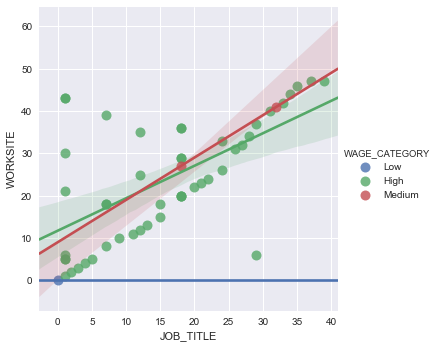

In [37]:
sns.lmplot('JOB_TITLE','WORKSITE',data=train_set.head(50),fit_reg=True,hue='WAGE_CATEGORY',scatter_kws={'marker':'D','s':100})